In [306]:
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from matplotlib import colors as clrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [312]:
def nonlinear(x):
    return 20*np.log10(x)

def cpu2gpu(cpu_hour):
    # ad-hoc choice obtained from NCSA proposal page
    # with 700k cpu hour limit vs. 25k gpu hour limit
    conversion_factor = 25/700
    return conversion_factor * cpu_hour

def gpu2cpu(gpu_hour):
    # ad-hoc choice obtained from NCSA proposal page
    # with 700k cpu hour limit vs. 25k gpu hour limit
    conversion_factor = 700/25
    return conversion_factor * gpu_hour

In [313]:
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#17becf', '#7f7f7f', '#bcbd22', '#d62728']

In [314]:
plt.style.use([hep.style.ROOT, hep.style.firamath])
hep.set_style("CMS")
# hep.set_style({"font.sans-serif":'Comic Sans MS'})

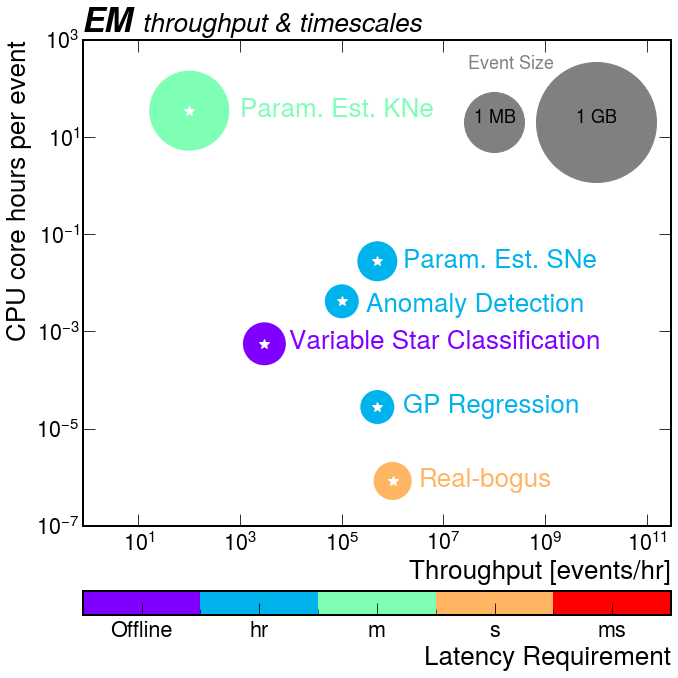

In [315]:
# CPU plot

labels = [
    'Variable Star Classification',
    'Param. Est. KNe',
    'Param. Est. SNe',
    'GP Regression',
    'Anomaly Detection',
    'Real-bogus',
]
x = np.array([3000, 100, 5e5, 5e5, 1e5, 1e6]) # events/hr
y = np.array([2/60/60, 35, 10000*0.01/60/60, 1/10/60/60, 15/60/60, 10/60/200e3]) # Core-hours / event
w = np.array([140, 10000, 100, 50, 50, 80]) # data size per event kB
z = np.array([-2, 0, -1, -1, -1, 1]) # Latency


# cmap = plt.cm.rainbow
norm = clrs.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)

f, ax = plt.subplots()

for xi, yi, wi, l, zi in zip(x, y, w, labels, z):
    ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, edgecolor='none', label=l, s=1.*nonlinear(wi)*nonlinear(wi))
    ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')
    if 'Classification' in l:
        ax.text(xi*3, yi*0.8, l, color=cmap(norm(zi)))
    elif 'Anomaly Detection' in l:
        ax.text(xi*3, yi*0.6, l, color=cmap(norm(zi)))
    elif 'Param. Est. KNe' in l:
        ax.text(xi*10, yi*0.75, l, color=cmap(norm(zi)))
        # ax.text(xi*0.01, yi*0.04, l, color=cmap(norm(zi)))
    elif 'Param. Est. SNe' in l:
        ax.text(xi*3.2, yi*0.75, l, color=cmap(norm(zi)))
    elif 'Real-Bogus' in l:
        ax.text(xi*1.4, yi*0.8, l, color=cmap(norm(zi)))
    elif 'DIA' in l:
        ax.text(xi*12, yi*1.1, l, color=cmap(norm(zi)))
    else:
        ax.text(xi*3.2, yi*0.75, l, color=cmap(norm(zi)))



ax.scatter([1e8], [20], label='1 MB', marker='o', s=1.*nonlinear(1000)*nonlinear(1000), color='gray')
ax.scatter([1e10], [20], label='1 GB', marker='o', s=1.*nonlinear(1000000)*nonlinear(1000000), color='gray')
ax.text(.4*1e8, 20, '1 MB', color='black',size=18)
ax.text(.4*1e10, 20, '1 GB', color='black',size=18)
ax.text(.3*1e8, 250, 'Event Size', color='grey',size=18)


hep.label.exp_text(text=" throughput & timescales",exp="EM",italic=(True, True),loc=0,pad=0)

ymin = .0000001
ymax = 1000
xmin = 8e-1
xmax = 3e11


ax.loglog()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('Throughput [events/hr]')
ax.set_ylabel('CPU core hours per event')



divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='5%', pad=0.9, pack_start = True)
f.add_axes(cax)

PCM=ax.get_children()[0]
cbar = plt.colorbar(PCM, ax=ax, ticks=np.linspace(-2, 2, 5), label='Latency Requirement', cax = cax, orientation = 'horizontal')
cbar.ax.set_xticklabels(['Offline','hr','m','s', 'ms'])

plt.tight_layout()
plt.savefig('em-plot-cpu-v2.pdf')

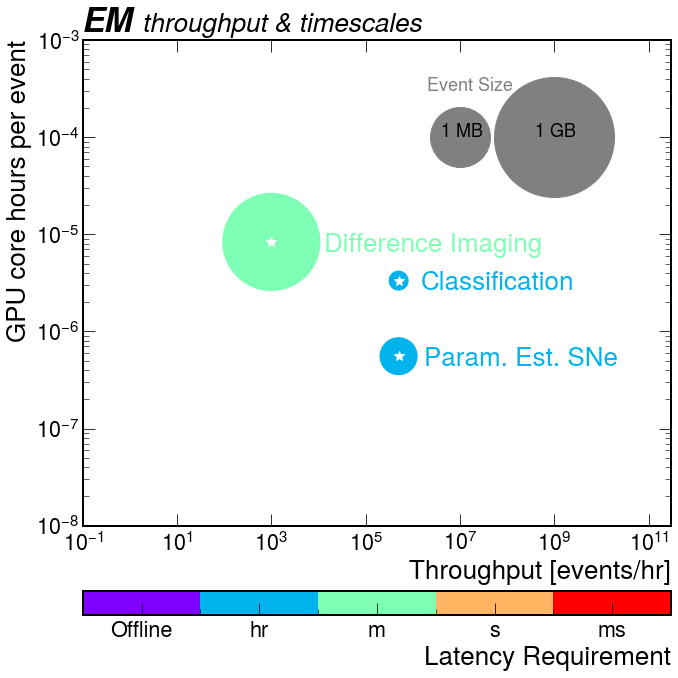

In [316]:
# GPU plot

labels = [
    'Param. Est. SNe',
    'Classification',
    'Difference Imaging'
]
x = np.array([5e5, 5e5, 1000]) # events/hr
y = np.array([1/500/60/60, 1/60/5000, 0.03/60/60]) # Core-hours / event
w = np.array([80, 10, 81250]) # data size per event
z = np.array([-1, -1, 0]) # Latency


# cmap = plt.cm.rainbow
norm = clrs.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)

f, ax = plt.subplots()

#for xi, yi, wi, l, c in zip(x, y, w, labels, colors):
for xi, yi, wi, l, zi in zip(x, y, w, labels, z):
    ax.scatter([xi], [yi], c=[zi], cmap=cmap, norm=norm, edgecolor='none', label=l, s=1.*nonlinear(wi)*nonlinear(wi))
    ax.plot([xi], [yi], label=l, marker='*', markersize=10, color='white')
    if 'Classification' in l:
        ax.text(xi*3, yi*0.8, l, color=cmap(norm(zi)))
    elif 'Anomaly detection' in l:
        ax.text(xi*3, yi*0.8, l, color=cmap(norm(zi)))
    elif 'Param. Est. KNe' in l:
        ax.text(xi*0.05, yi*2.4, l, color=cmap(norm(zi)))
    elif 'Param. Est. SNe' in l:
        ax.text(xi*3.5, yi*0.8, l, color=cmap(norm(zi)))
    elif 'Difference Imaging' in l:
        ax.text(xi*13, yi*0.8, l, color=cmap(norm(zi)))
    else:
        ax.text(xi*3, yi*0.8, l, color=cmap(norm(zi)))


ax.scatter([1e7], [0.0001], label='1 MB', marker='o', s=1.*nonlinear(1000)*nonlinear(1000), color='gray')
ax.scatter([1e9], [0.0001], label='1 GB', marker='o', s=1.*nonlinear(1000000)*nonlinear(1000000), color='gray')
ax.text(.4*1e7, 0.0001, '1 MB', color='black',size=18)
ax.text(.4*1e9, 0.0001, '1 GB', color='black',size=18)
ax.text(.2*1e7, 0.0003, 'Event Size', color='grey',size=18)


hep.label.exp_text(text=" throughput & timescales",exp="EM",italic=(True, True),loc=0,pad=0)

ymin = .00000001
ymax = 0.001
xmin = 1e-1
xmax = 3e11

ax.loglog()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('Throughput [events/hr]')
ax.set_ylabel('GPU core hours per event')



divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='5%', pad=0.9, pack_start = True)
f.add_axes(cax)

PCM=ax.get_children()[0]
cbar = plt.colorbar(PCM, ax=ax, ticks=np.linspace(-2, 2, 5), label='Latency Requirement', cax = cax, orientation = 'horizontal')
cbar.ax.set_xticklabels(['Offline','hr','m','s', 'ms'])

plt.tight_layout()
plt.savefig('em-plot-gpu-v2.pdf')